<a href="https://colab.research.google.com/github/KritiJain01/WildlifeAIClassifier/blob/main/WildlifeAIClassifier_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing all the required libraries and frameworks
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import os
from PIL import Image
from torchvision.datasets import ImageFolder

#Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
c_path = Path("/content/drive/MyDrive/BioDiversity/train/cheetah")
f_path = Path("/content/drive/MyDrive/BioDiversity/train/fox")
h_path = Path("/content/drive/MyDrive/BioDiversity/train/hyena")
l_path = Path("/content/drive/MyDrive/BioDiversity/train/lion")
t_path = Path("/content/drive/MyDrive/BioDiversity/train/tiger")
w_path = Path("/content/drive/MyDrive/BioDiversity/train/wolf")

image_paths = []
label_name = []
for file in os.listdir(c_path):
    image_paths.append(os.path.join(c_path, file))
    label_name.append("Cheetah")

for file in os.listdir(f_path):
    image_paths.append(os.path.join(f_path, file))
    label_name.append("Fox")

for file in os.listdir(h_path):
    image_paths.append(os.path.join(h_path, file))
    label_name.append("Hyena")

for file in os.listdir(l_path):
    image_paths.append(os.path.join(l_path, file))
    label_name.append("Lion")

for file in os.listdir(t_path):
    image_paths.append(os.path.join(t_path, file))
    label_name.append("Tiger")

for file in os.listdir(w_path):
    image_paths.append(os.path.join(w_path, file))
    label_name.append("Wolf")

print(len(image_paths))

label_df = pd.DataFrame({'label': label_name})
imgpath_df = pd.DataFrame({'image_paths' : image_paths })
df = pd.concat([label_df , imgpath_df ], axis=1)

data = df.sample(frac=1, random_state=42)
data = data.reset_index(drop=True)

print(data)

test_c_path = Path("/content/drive/MyDrive/BioDiversity/test/cheetah")
test_f_path = Path("/content/drive/MyDrive/BioDiversity/test/fox")
test_h_path = Path("/content/drive/MyDrive/BioDiversity/test/hyena")
test_l_path = Path("/content/drive/MyDrive/BioDiversity/test/lion")
test_t_path = Path("/content/drive/MyDrive/BioDiversity/test/tiger")
test_w_path = Path("/content/drive/MyDrive/BioDiversity/test/wolf")

test_image_paths = []
test_label_name = []
for file in os.listdir(test_c_path):
    test_image_paths.append(os.path.join(test_c_path, file))
    test_label_name.append("Cheetah")

for file in os.listdir(test_f_path):
    test_image_paths.append(os.path.join(test_f_path, file))
    test_label_name.append("Fox")

for file in os.listdir(test_h_path):
    test_image_paths.append(os.path.join(test_h_path, file))
    test_label_name.append("Hyena")

for file in os.listdir(test_l_path):
    test_image_paths.append(os.path.join(test_l_path, file))
    test_label_name.append("Lion")

for file in os.listdir(test_t_path):
    test_image_paths.append(os.path.join(test_t_path, file))
    test_label_name.append("Tiger")

for file in os.listdir(test_w_path):
    test_image_paths.append(os.path.join(test_w_path, file))
    test_label_name.append("Wolf")

print(len(test_image_paths))

test_label_df = pd.DataFrame({'label': test_label_name})
test_imgpath_df = pd.DataFrame({'image_paths' :test_image_paths })
# if that's what you want.
test_df = pd.concat([test_label_df , test_imgpath_df ], axis=1)

test = test_df.sample(frac=1, random_state=42)
test = test.reset_index(drop=True)

print(test)

1420
        label                                        image_paths
0     Cheetah  /content/drive/MyDrive/BioDiversity/train/chee...
1         Fox  /content/drive/MyDrive/BioDiversity/train/fox/...
2       Hyena  /content/drive/MyDrive/BioDiversity/train/hyen...
3       Tiger  /content/drive/MyDrive/BioDiversity/train/tige...
4         Fox  /content/drive/MyDrive/BioDiversity/train/fox/...
...       ...                                                ...
1415    Tiger  /content/drive/MyDrive/BioDiversity/train/tige...
1416    Tiger  /content/drive/MyDrive/BioDiversity/train/tige...
1417     Wolf  /content/drive/MyDrive/BioDiversity/train/wolf...
1418     Lion  /content/drive/MyDrive/BioDiversity/train/lion...
1419    Tiger  /content/drive/MyDrive/BioDiversity/train/tige...

[1420 rows x 2 columns]
300
       label                                        image_paths
0       Lion  /content/drive/MyDrive/BioDiversity/test/lion/...
1       Wolf  /content/drive/MyDrive/BioDiversity/test/wol

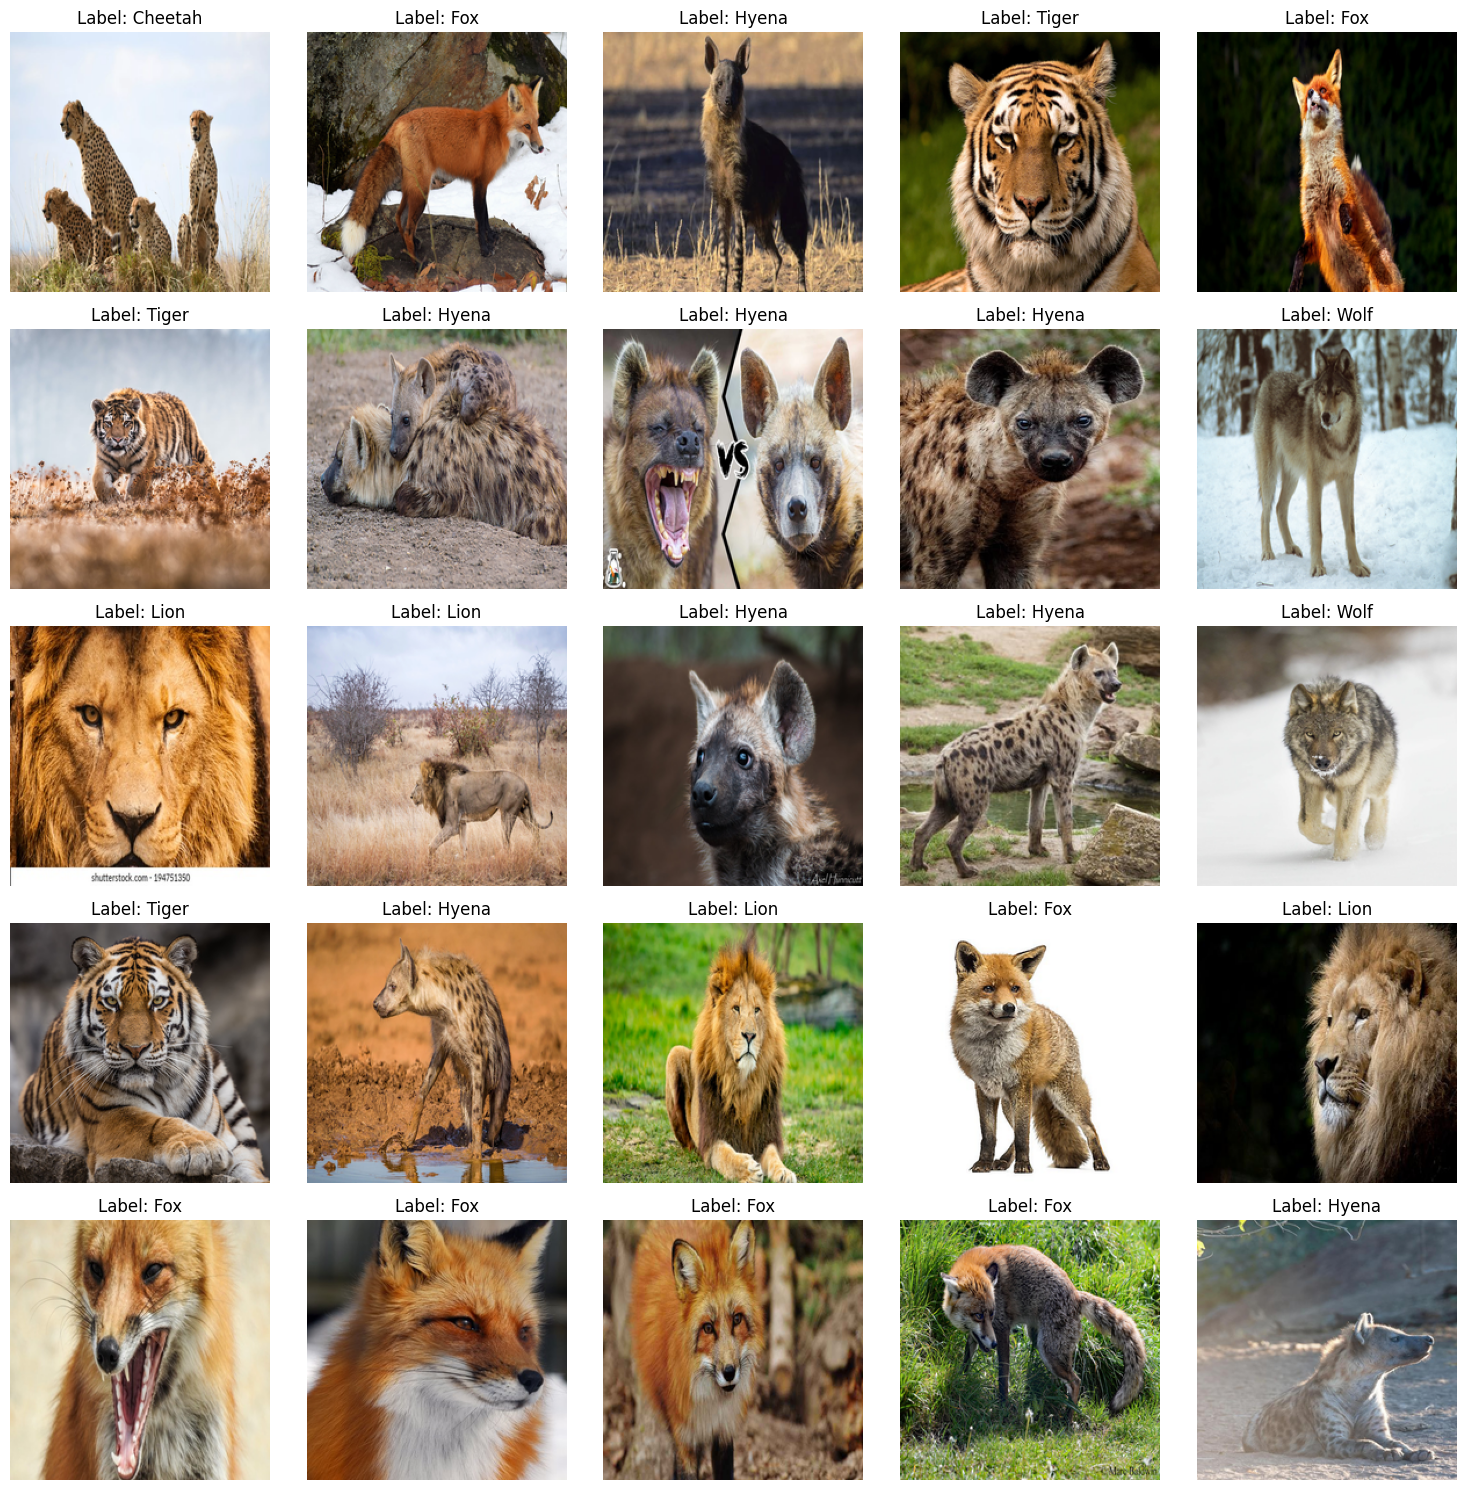

In [ ]:
fig, axes = plt.subplots(5 , 5, figsize=(15, 15))
for i in range(25):
    row = i // 5
    col = i % 5
    image_path = data['image_paths'][i]
    img = Image.open(image_path)
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"Label: {data['label'][i]}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets, models
# Data Normalisation
data_dir = '/content/drive/MyDrive/BioDiversity'
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                 for x in ['train']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train']}

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Training 3 Different Pre-Trained Models
#model1 : ResNet
model1 = models.resnet18(pretrained=True)
num_ftrs = model1.fc.in_features
model1.fc = nn.Linear(num_ftrs, 6) # 6 is the number of classes

#model2 : VGG16
model2 = models.vgg16(pretrained=True)
model2.classifier[6] = torch.nn.Linear(4096, 6)

#model3 : DenseNet
model3 = models.densenet121(pretrained=True)
model3.classifier = torch.nn.Linear(1024, 6)

model_list = {'ResNet' : model1}

for name, model in model_list.items():
    print('{} Model Training'.format(name))
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.75)
    for epoch in range(10):
        for phase in ['train']:
            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            print('Epoch: {} Loss: {:.4f} Acc: {:.4f} %'.format(epoch + 1, epoch_loss, epoch_acc * 100))

print('Training completed')

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can als

ResNet Model Training
Epoch: 1 Loss: 1.4323 Acc: 50.6338 %
Epoch: 2 Loss: 0.8496 Acc: 82.6056 %
Epoch: 3 Loss: 0.6142 Acc: 87.3239 %
Epoch: 4 Loss: 0.5012 Acc: 89.5070 %
Epoch: 5 Loss: 0.4159 Acc: 91.6197 %
Epoch: 6 Loss: 0.3928 Acc: 91.3380 %
Epoch: 7 Loss: 0.3550 Acc: 91.1268 %
Epoch: 8 Loss: 0.3475 Acc: 91.1268 %
Epoch: 9 Loss: 0.3165 Acc: 91.7606 %
Epoch: 10 Loss: 0.2831 Acc: 92.8873 %
Training completed


In [ ]:
import torch.optim as optim
# Data Normalisation
data_dir = '/content/drive/MyDrive/BioDiversity'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define a transform to augment the data
transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testset = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/BioDiversity/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('Cheetah', 'Fox', 'Hyena', 'Lion', 'Tiger', 'Wolf')

for name, model in model_list.items():
    net = model
    net.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the {} model on the test images: {} %'.format(name, 100 * correct / total))

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Accuracy of the ResNet model on the test images: 94.66666666666667 %


In [ ]:
import pickle

# Assuming 'model' is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)